In [193]:
import numpy as np
import pandas as pd

import copy
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math
import datetime
import scipy as sp
import utm

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

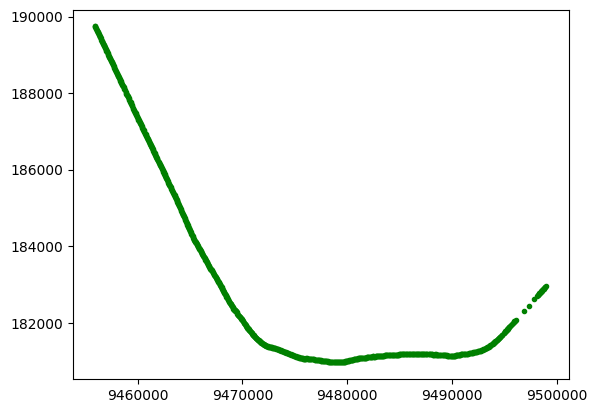

In [194]:
pd_dataset = pd.read_csv(r"636092331_non_lin.csv")
plt.plot(pd_dataset['lat'],pd_dataset['long'], 'g.')
plt.show()

# Subsampling time intervals

In [195]:
pd_dataset.iloc[np.arange(0,20,1),:]

,datetimestamp,deltatime,lat,long,cog,sog,rot
0,0.0,0,9.455960e+06,189742.056703,4.284783,4.064111,0.002036
1,11.0,11,9.498936e+06,182962.757845,4.293510,4.218444,0.001164
2,21.0,10,9.498878e+06,182944.662094,4.281293,4.269889,-0.003491
3,31.0,10,9.498823e+06,182927.995046,4.283038,4.321333,0.004363
4,42.0,11,9.498747e+06,182906.635080,4.290019,4.372778,-0.001454
5,51.0,9,9.498697e+06,182892.060130,4.293510,4.321333,-0.005818
6,60.0,9,9.498645e+06,182877.381479,4.286529,4.269889,-0.004654
7,71.0,11,9.498582e+06,182858.081744,4.277802,4.269889,-0.003200
8,81.0,10,9.498534e+06,182841.610833,4.260349,4.269889,0.002909
9,91.0,10,9.498472e+06,182820.532650,4.251622,4.218444,-0.002618


In [196]:
def subsample_obs_time(df_in, time_interval_sec, obs_per_interval):

    obs = obs_per_interval
    time_inteval = time_interval_sec

    #Max and min time
    maxtime = max(df_in['datetimestamp'])
    mintime = min(df_in['datetimestamp'])

    #Total number of time sections in the data
    total_iter = int(maxtime/time_inteval) +1

    #start interval, inclusive
    lowerbound = mintime 

    #initial size, exclusive
    upperbound = time_inteval 


    #Result DATAFRAME
    df_sub_result = df_in.copy(deep = True)
    df_sub_result = df_sub_result.iloc[0:0] #drop all entries in the dataframe



    for subset_walk in np.arange(1,total_iter+2,1):#each subset present


        boolean_selection = ((lowerbound < df_in['datetimestamp']) & (df_in['datetimestamp'] <= upperbound)).values

        #subset for this interval
        time_subset = copy.deepcopy(df_in.iloc[boolean_selection,:])



        # subsampling the time sibset

        if obs < len(time_subset): #if the no of observations is lessthat the total in the timestep continue, else nothing
            for subsample in np.arange(0,len(time_subset), obs): #step with size = obs to sample each value in the set
                '''
                Think it should rather pick random 5 values in the time range, to not give bias to the firs,
                
                TOEMAAR DAN MAAK ONS DIT NIE REPRESENTATIVE VAN SPOED NIE
                '''
                
                '''Appending a new row to the dagtaframe'''
                df_sub_result = df_sub_result.append(time_subset.iloc[subsample,:])


        #update bounds
        #start interval, inclusive
        lowerbound = copy.deepcopy(upperbound)
        upperbound = time_inteval*subset_walk


    return df_sub_result



In [197]:
df_sampled = subsample_obs_time(pd_dataset, 240, 20)
df_sampled

,datetimestamp,deltatime,lat,long,cog,sog,rot
38,721.0,9.0,9.494887e+06,181726.526158,4.302237,4.269889,0.006109
58,932.0,10.0,9.493735e+06,181425.478060,4.431391,4.012667,-0.003200
61,970.0,10.0,9.493523e+06,181385.233307,4.443608,3.806889,-0.004654
81,1181.0,10.0,9.492300e+06,181239.314427,4.560545,3.652556,-0.003200
83,1202.0,12.0,9.492182e+06,181231.347770,4.581489,3.652556,0.003782
...,...,...,...,...,...,...,...
822,8841.0,9.0,9.457991e+06,188543.706770,5.457645,3.241000,-0.003782
825,8881.0,10.0,9.457841e+06,188640.018183,5.466371,3.549667,0.000000
845,9082.0,10.0,9.457071e+06,189094.256151,5.424483,3.395333,-0.004072
849,9123.0,12.0,9.456925e+06,189182.228542,5.424483,3.395333,0.004654


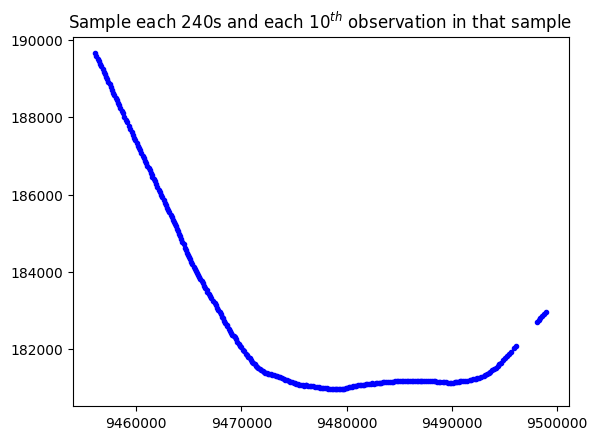

299
875


In [241]:
df_sampled = subsample_obs_time(pd_dataset, 240, 3)
plt.plot(df_sampled['lat'], df_sampled['long'], 'b.')
plt.title("Sample each 240s and each $10^{th}$ observation in that sample")
plt.show()

print(len(df_sampled))
print(len(pd_dataset))

# Kalman -Conversions

In [199]:
def convert_cog(data_in):
    return data_in*np.pi/180 #convert to radians
def convert_rot(data_in):
    return (data_in/60)*np.pi/180 #rad per second
    

def convert_sog(data_in):
    return data_in*0.5144444444 #meter per second

def convert_dataset(data_in):
    #Converting time date:
    df_sorted = copy.deepcopy(data_in.sort_values(by = 'datetimestamp', ascending = True ))
    first_obs_date = df_sorted.iloc[0,6]

    
    df_sorted['datetimestamp'] = ((pd.to_datetime(df_sorted['datetimestamp']) - pd.to_datetime(first_obs_date)).dt.total_seconds())

    #Conversion of Course over ground
    df_sorted['cog'] = convert_cog(df_sorted['cog'])
    
    #Convert Speed over ground to mps
    df_sorted['sog'] = convert_sog(df_sorted['sog'])
    
    #Convert rate of turn 
    df_sorted['rot'] = convert_rot(df_sorted['rot'])
    
    #Making the order same as testset
    
    df_sorted = df_sorted[['datetimestamp', 'lat', 'long', 'cog', 'sog','rot']]
    
    #Adding delta time and updating the order again & CONVERT X Y
    
    X = []
    X.append(utm.from_latlon(df_sorted['lat'][0], df_sorted['long'][0])[0])
    Y = []
    Y.append(utm.from_latlon(df_sorted['lat'][0], df_sorted['long'][0])[1])

    delta_time = []
    for i in np.arange(1, len(df_sorted['datetimestamp']),1):
        delta_time.append(int(df_sorted['datetimestamp'][i-1])-int(df_sorted['datetimestamp'][i]))
        ans = utm.from_latlon(df_sorted['lat'].values[i], df_sorted['long'].values[i])
        X.append(copy.deepcopy(ans[0]))
        Y.append(copy.deepcopy(ans[1]))
    
    
    delta_time.append(0)
    
    reversed_list = np.array(delta_time[::-1])
    df_sorted.insert(1,'deltatime',reversed_list) #adding the delta time row

    df_sorted['lat'] = Y
    df_sorted['long'] = X
   
    return df_sorted
    
    

## Kalman Filter

In [395]:
def deg_to_rad(deg):
    return deg*np.pi/180

def rad_to_deg(rad):
    return rad*180/np.pi

def get_mat_A(deltaTime):
    A = np.identity(4)
    A[0,2] = deltaTime
    A[1,3] = deltaTime
    return A

def predict_state(A, X_prev, a_x, a_y, deltaTIME):
        
    Bu_k = np.array([[a_x*deltaTIME*deltaTIME/2],
                     [a_y*deltaTIME*deltaTIME/2],
                     [a_x*deltaTIME],
                     [a_y*deltaTIME]])
    
    pred_state = A.dot(X_prev) + Bu_k
    return pred_state

def pred_err_cov(A, Pk, Q):
    return A.dot(Pk).dot(np.transpose(A)) + Q

def Kalman_gain(P_k, H, R):
    above = P_k.dot(np.transpose(H))
    bottom = np.linalg.inv(H.dot(P_k).dot(np.transpose(H)) + R)
    return above.dot(bottom)

def adjust_pred_state(pred_state, Kk,z_k,H):
    #Where z_k == the real observed value to adjust for the errors made
    return pred_state + Kk.dot(z_k - H.dot(pred_state))

def update_err_cov(I,Kk,H,P_k):
    return (I - Kk.dot(H)).dot(P_k)    

def calc_a_xy(arr_in, arr_prev):
    
    sog_now = np.around(arr_in[5],8)
    sog_prev = np.around(arr_prev[5],8)
    
    cog_now = np.around(arr_in[4],8)
    cog_prev = np.around(arr_prev[4],8)
    
    rot_now = np.around(arr_in[6],6)
    
    delta_time = arr_in[1]
    
    a_x = (sog_now*np.cos(cog_now + rot_now*delta_time) - sog_prev*np.cos(cog_prev))/delta_time
    
    a_y = (sog_now*np.sin(cog_now + rot_now*delta_time) - sog_prev*np.sin(cog_prev))/delta_time 

    
    return a_x, a_y


def convert_state(arr_in):
    sog = arr_in[5]
    cog = arr_in[4]
    
    x = arr_in[2]
    y = arr_in[3]
    Vx = sog*np.cos(deg_to_rad(cog))
    Vy = sog*np.sin(deg_to_rad(cog))
    
    return_arr = np.array([[x],[y],[Vx],[Vy]])
    
    return return_arr

def extract_long_lat_covariance(mat_in):
    Var1 = mat_in[0,0]
    Var2 = mat_in[1,1]
    Cov12 = mat_in[0,1]
    
    result = np.array([[Var1,Cov12],[Cov12,Var2]])
    return result
    

## Implementing Kalman

In [504]:

ax_arr = []
ay_arr= []
Pk_save_states = []
def myKalman(pd_final, R,Q,P_k):
    H = np.identity(4)
    I = np.identity(4)
    # Kalman Initial state
    X_state = np.array([[0],[0],[0],[0]])
    global ax_arr, ay_arr, df_final,Pk_save_states
    
    
    
    # Lists to append data and values to, saving ttansitions:
    ax_arr = []
    ay_arr = []
    X_save_states = []
    Pk_save_states = []
    Pk_save_states.append(copy.deepcopy(P_k))

    data_counter = 1 # counter for the original data set obsevations

    max_time = int(max(pd_final.iloc[:,0]))
    min_time = int(min(pd_final.iloc[:,0]))

    data_counter_stop = max_time-min_time

    for i in np.arange(0,max_time,1):

        '''If we observe the value we observe this'''
        if(i == 0 or (int(pd_final.iloc[data_counter,0]) == i and data_counter < data_counter_stop)):
            zk_prev = pd_final.iloc[data_counter-1,:].values #previous observation
            z_k = pd_final.iloc[data_counter,:].values # convert to numpy array -observed value

            delta_TIME = copy.deepcopy(z_k[1]) #difference in time
            A = get_mat_A(delta_TIME)

            #Acceleration
            ax, ay = calc_a_xy(z_k,zk_prev) 
            ax_arr.append(ax)
            ay_arr.append(ay)

            z_k = copy.deepcopy(convert_state(z_k)) #convert state
            X_state = copy.deepcopy(convert_state(zk_prev))

            #Kalman Predict--------------------------------------------------------------------------------------------
            X_state = copy.deepcopy(predict_state(A, X_state, ax, ay, 1))
            P_k =  copy.deepcopy(pred_err_cov(A, P_k, Q))

            #Kalman Measuremenet update--------------------------------------------------------------------------------
            Kalman_k = copy.deepcopy(Kalman_gain(P_k, H, R))
            X_state = copy.deepcopy(adjust_pred_state(X_state, Kalman_k, z_k, H))
            P_k = copy.deepcopy(update_err_cov(I, Kalman_k, H, P_k))


            #increment counter
            data_counter += 1

            #Saving states
            X_save_states.append(copy.deepcopy(X_state))
            Pk_save_states.append(copy.deepcopy(P_k))

        else:
            '''This code will be excecuted when we have no observation'''

            ay = 0
            ax = 0
            A = get_mat_A(1)
            #Kalman Predict --------------------------------------------------------------------------
            X_state = copy.deepcopy(predict_state(A, X_state, ax, ay, 1))
            P_k =  copy.deepcopy(pred_err_cov(A,P_k,Q))

            #Saving states
            Pk_save_states.append(copy.deepcopy(P_k))
            X_save_states.append(copy.deepcopy(X_state))




    # Saving the coordinates:
    X_coord = []
    Y_coord = []
    Pk_coord  = []

    for i in range(0,len(X_save_states)):
        if i > 1 and  i % 1 == 0:
            X_coord.append(X_save_states[i][0][0])
            #print(X_save_states[i][0][0])
            Y_coord.append(X_save_states[i][1][0])
            Pk_coord.append(extract_long_lat_covariance(Pk_save_states[i]))

    #Extracting the original data:
    X_orig = copy.deepcopy(pd_final.iloc[:,2])
    Y_orig = copy.deepcopy(pd_final.iloc[:,3])

    # Plotting the original vs predicted    
    plt.plot(X_orig,Y_orig,"rx")    
    plt.plot(X_coord,Y_coord, "b.")
    
    plt.show()


    #Plotting both banned by the original's  min and max
    plt.plot(X_coord,Y_coord, "b.")
    plt.plot(X_orig.values[np.arange(0, len(X_orig),5)],Y_orig.values[np.arange(0, len(X_orig),5)],"rx")
    plt.title("Kalman prediction and original data")
    plt.xlabel("X - coordinate")
    plt.ylabel("Y - coordinate")
    legend_data = np.array(["Prediction","Original"])
    plt.legend(legend_data, loc = "best")
    plt.xlim(min(X_orig)-500, max(X_orig)+500)
    plt.ylim(min(Y_orig)-500,max(Y_orig)+500)
    plt.show()

    print("ax-var: ", np.var(ax_arr))
    print("ay-var: ", np.var(ay_arr))
    
    return X_coord,Y_coord,X_orig,Y_orig,ax_arr,ay_arr







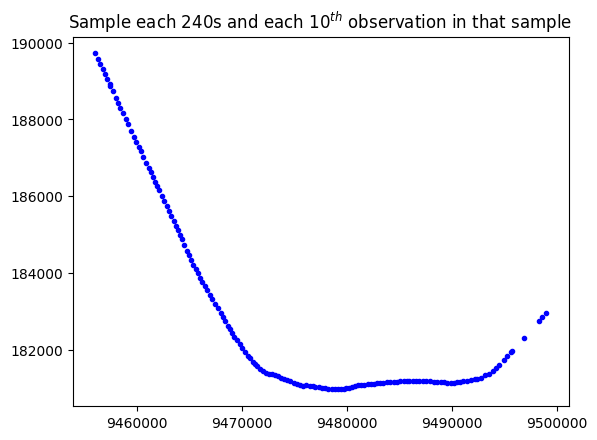

In [534]:
df_sampled = subsample_obs_time(pd_dataset, 600, 6)
plt.plot(df_sampled['lat'], df_sampled['long'], 'b.')
plt.title("Sample each 240s and each $10^{th}$ observation in that sample")
plt.show()

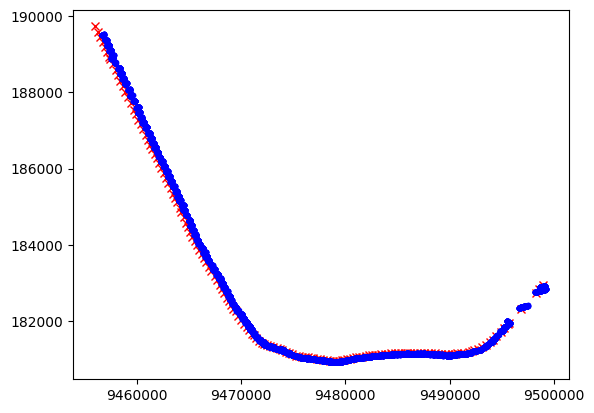

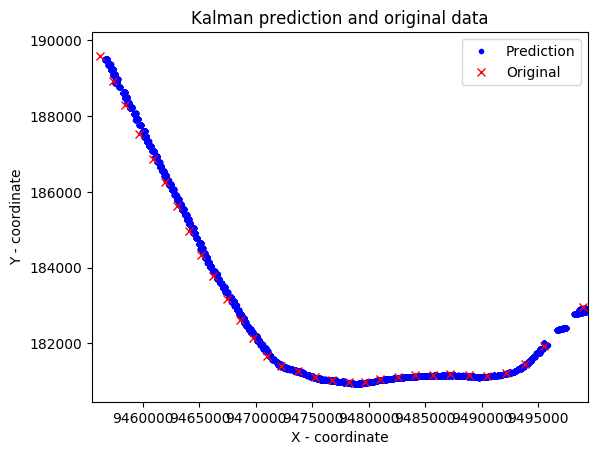

ax-var:  0.0006421673275908061
ay-var:  0.0006793835658983717


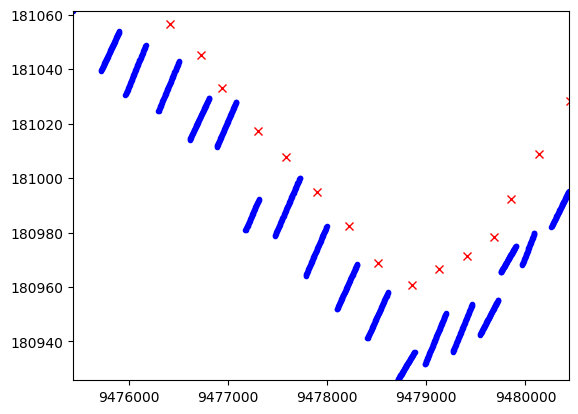

In [535]:
P_k = np.array([[159577732],[50],[0.3],[0.3]]).dot(np.transpose(np.array([[50],[50],[0.3],[0.3]])))
R = np.diag(np.array([5000,5000,0.003,0.003]))
Q = np.array([[50000],[5000],[0.01],[0.01]]).dot(np.transpose(np.array([[50000],[5000],[0.01],[0.01]])))


a_x_var = 0.0005367381380003471
a_y_var = 0.0004538176821919675
var_lat = np.var(df_sampled['lat'])
var_long = np.var(df_sampled['long'])




P_k = np.array([[np.sqrt(var_lat)],
                [np.sqrt(var_long)],
                [np.sqrt(a_x_var)],
                [np.sqrt(a_y_var)]]
              ).dot(np.transpose(
    np.array([[np.sqrt(var_lat)],
              [np.sqrt(var_long)],
                [np.sqrt(a_x_var)],
                [np.sqrt(a_y_var)]]
            )))


Q = copy.deepcopy(P_k)


R = np.diag(np.array([var_lat+666666
                      , var_long+88888,a_x_var+99, a_y_var+99]))





X_samp_pred, Y_samp_pred, X_samp_orig, Y_samp_orig, axx, ayy = myKalman(df_sampled, R,Q,P_k)
X_samp_pred = np.array(X_samp_pred)
Y_samp_pred = np.array(Y_samp_pred)
X_samp_orig = np.array(X_samp_orig)
Y_samp_orig = np.array(Y_samp_orig)

closer_look = np.arange(3500,4500,1)

plt.plot(X_samp_orig, Y_samp_orig, "rx")
plt.plot(X_samp_pred[closer_look], Y_samp_pred[closer_look], "b.")
plt.xlim(min(X_samp_pred[closer_look]),max(X_samp_pred[closer_look]))
plt.ylim(min(Y_samp_pred[closer_look]),max(Y_samp_pred[closer_look]))

plt.show()


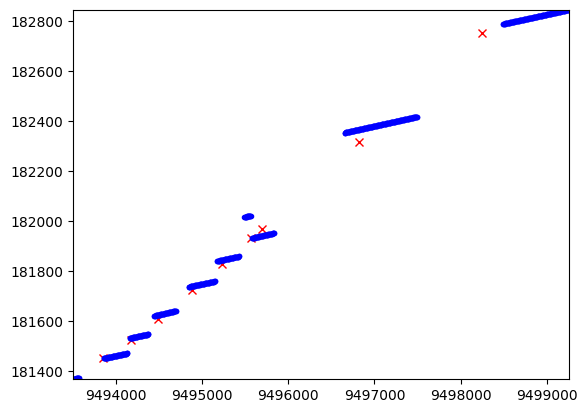

In [538]:
closer_look = np.arange(200,1000,1)

plt.plot(X_samp_orig, Y_samp_orig, "rx")
plt.plot(X_samp_pred[closer_look], Y_samp_pred[closer_look], "b.")
plt.xlim(min(X_samp_pred[closer_look]),max(X_samp_pred[closer_look]))
plt.ylim(min(Y_samp_pred[closer_look]),max(Y_samp_pred[closer_look]))

plt.show()

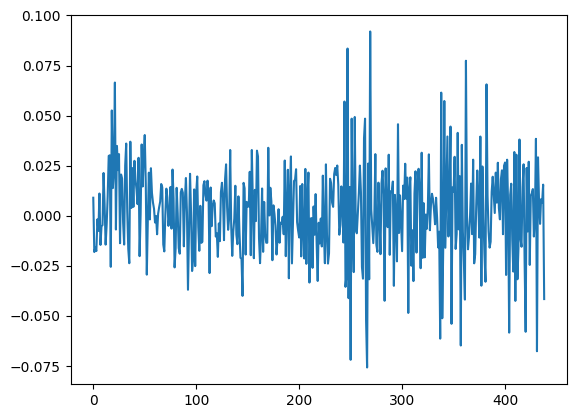

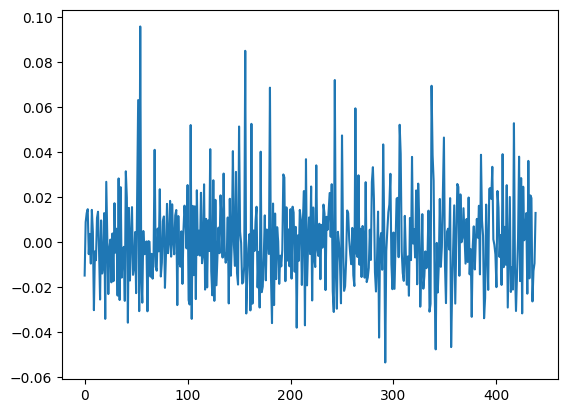

In [459]:
plt.plot(np.arange(0,len(axx),1),axx)
plt.show()

plt.plot(np.arange(0,len(ayy),1),ayy)
plt.show()